In [135]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv(
    "../data/raw/Twitch_Stream_Data.csv",
    parse_dates=["TimestampUTC", "StarttimeUTC"],
    #  dtype={
    #      "CurrentGameID": "Int64",
    #      "ViewerCount": "Int64"
    #  },
    # on_bad_lines="warn",
    # encoding_errors="ignore"
)

/var/folders/bk/s_5vnj893rd3cnjz135rv2180000gn/T/ipykernel_7216/667315795.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7936172 entries, 0 to 7936171
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Name           object        
 1   TimestampUTC   datetime64[ns]
 2   CurrentGameID  float64       
 3   StreamTitle    object        
 4   ViewerCount    object        
 5   StarttimeUTC   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 363.3+ MB


In [59]:
df = df.fillna(np.nan)

In [60]:
df[df["Name"].isna()]

,Name,TimestampUTC,CurrentGameID,StreamTitle,ViewerCount,StarttimeUTC


In [65]:
df["ViewerCount"] = pd.to_numeric(df["ViewerCount"], errors="coerce")
df["StarttimeUTC"] = pd.to_datetime(df["StarttimeUTC"], errors="coerce")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7936172 entries, 0 to 7936171
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Name           object        
 1   TimestampUTC   datetime64[ns]
 2   CurrentGameID  float64       
 3   StreamTitle    object        
 4   ViewerCount    float64       
 5   StarttimeUTC   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 363.3+ MB


In [139]:
df = df.dropna(subset=["Name", "StarttimeUTC", "TimestampUTC"], axis=0)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7936143 entries, 0 to 7936171
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Name           object        
 1   TimestampUTC   datetime64[ns]
 2   CurrentGameID  float64       
 3   StreamTitle    object        
 4   ViewerCount    float64       
 5   StarttimeUTC   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 423.8+ MB


In [141]:
df["Name"] = df["Name"].str.lower()
df["StreamTitle"] = df["StreamTitle"].str.lower()

In [142]:
df.groupby("Name", as_index=False).agg({"TimestampUTC":"nunique", "ViewerCount": ["min","max"]}).sort_values(("ViewerCount", "max"), ascending=False)

Name TimestampUTC ViewerCount           
                          nunique         min        max
2125        thegrefg         2872         0.0  2470347.0
1760       riotgames         3697         0.0   669912.0
1169       lck_korea         1499         0.0   365983.0
119              aoc           26     19836.0   308422.0
791           gaules        17597         0.0   303171.0
...              ...          ...         ...        ...
871       hespanholl           26         0.0        2.0
9     1thehunterrrr_           51         0.0        2.0
1047     julianitf33           38         0.0        2.0
1808      s1mpletdua            2         0.0        0.0
2164         tmichtv            1         0.0        0.0

[2458 rows x 4 columns]

In [143]:
user = ["thegrefg"]
game_id = [33214.0] # fornite

In [144]:
df[df["Name"].isin(user)].sort_values("TimestampUTC", ascending=True)

,Name,TimestampUTC,CurrentGameID,StreamTitle,ViewerCount,StarttimeUTC
4510971,thegrefg,2020-12-11 22:20:00,33214.0,? mejorando en fortnite con magik y vicens por...,0.0,2020-12-11 22:19:01
4511278,thegrefg,2020-12-11 22:25:00,33214.0,? mejorando en fortnite con magik y vicens por...,924.0,2020-12-11 22:19:01
4511585,thegrefg,2020-12-11 22:30:00,33214.0,? mejorando en fortnite con magik y vicens por...,1635.0,2020-12-11 22:19:01
4511890,thegrefg,2020-12-11 22:35:00,33214.0,? mejorando en fortnite con magik y vicens por...,22768.0,2020-12-11 22:19:01
4512197,thegrefg,2020-12-11 22:40:00,33214.0,? mejorando en fortnite con magik y vicens por...,29684.0,2020-12-11 22:19:01
...,...,...,...,...,...,...
7916594,thegrefg,2021-02-04 21:15:00,33214.0,? charlando con ustedes y grabando cositas ?,21165.0,2021-02-04 18:02:55
7916873,thegrefg,2021-02-04 21:20:00,33214.0,? charlando con ustedes y grabando cositas ?,22498.0,2021-02-04 18:02:55
7917150,thegrefg,2021-02-04 21:25:00,33214.0,? charlando con ustedes y grabando cositas ?,23632.0,2021-02-04 18:02:55
7917422,thegrefg,2021-02-04 21:30:00,33214.0,? charlando con ustedes y grabando cositas ?,21598.0,2021-02-04 18:02:55


In [145]:
df[df["Name"].isin(user)].groupby(["Name", "StreamTitle", "CurrentGameID"], as_index=False).agg({"TimestampUTC": ["min", "max","nunique"], "ViewerCount":["min","max"]}).sort_values(("TimestampUTC", "min"), ascending=True)

Name                                        StreamTitle  \
                                                                   
49   thegrefg  ? mejorando en fortnite con magik y vicens por...   
12   thegrefg  4/6 ?? torneo de fortnite grefg ampeter y magi...   
16   thegrefg  6/6 ?? torneo de fortnite grefg ampeter y magi...   
131  thegrefg  ?? torneo de fortnite grefg ampeter y magik vs...   
123  thegrefg  ?? torneo $100.000 con el escuadrón salchichón ??   
..        ...                                                ...   
146  thegrefg  ??? la despedida a egoland y probando lo nuevo...   
145  thegrefg  ??? la despedida a egoland y probando lo nuevo...   
144  thegrefg  ??? la despedida a egoland y probando lo nuevo...   
31   thegrefg       ? charlando con ustedes y grabando cositas ?   
30   thegrefg       ? charlando con ustedes y grabando cositas ?   

    CurrentGameID        TimestampUTC                             ViewerCount  \
                                  min                 max nunique         min   
49        33214.0 2020-12-11 22:20:00 2020-12-12 01:00:00      17         0.0   
12        33214.0 2020-12-12 18:16:00 2020-12-12 18:16:00       1     41968.0   
16        33214.0 2020-12-12 19:15:00 2020-12-12 19:15:00       1     53080.0   
131       33214.0 2020-12-12 19:20:00 2020-12-12 19:30:00       3     40368.0   
123       33214.0 2020-12-13 18:15:00 2020-12-13 21:40:00      42      1865.0   
..            ...                 ...                 ...     ...         ...   
146      509658.0 2021-02-03 17:50:00 2021-02-03 18:00:00       3       836.0   
145      263490.0 2021-02-03 18:05:00 2021-02-03 19:05:00      13     23740.0   
144       33214.0 2021-02-03 19:10:00 2021-02-03 20:00:00      11     25389.0   
31       509658.0 2021-02-04 18:05:00 2021-02-04 19:40:00      20         0.0   
30        33214.0 2021-02-04 19:45:00 2021-02-04 21:35:00      23     20154.0   

              
         max  
49   36518.0  
12   41968.0  
16   53080.0  
131  50731.0  
123  68818.0  
..       ...  
146  19641.0  
145  32476.0  
144  32711.0  
31   40732.0  
30   32774.0  

[168 rows x 8 columns]

In [146]:
df[(df["Name"].isin(user)) & (df["CurrentGameID"].isin(game_id))].sort_values("TimestampUTC", ascending=True)

,Name,TimestampUTC,CurrentGameID,StreamTitle,ViewerCount,StarttimeUTC
4510971,thegrefg,2020-12-11 22:20:00,33214.0,? mejorando en fortnite con magik y vicens por...,0.0,2020-12-11 22:19:01
4511278,thegrefg,2020-12-11 22:25:00,33214.0,? mejorando en fortnite con magik y vicens por...,924.0,2020-12-11 22:19:01
4511585,thegrefg,2020-12-11 22:30:00,33214.0,? mejorando en fortnite con magik y vicens por...,1635.0,2020-12-11 22:19:01
4511890,thegrefg,2020-12-11 22:35:00,33214.0,? mejorando en fortnite con magik y vicens por...,22768.0,2020-12-11 22:19:01
4512197,thegrefg,2020-12-11 22:40:00,33214.0,? mejorando en fortnite con magik y vicens por...,29684.0,2020-12-11 22:19:01
...,...,...,...,...,...,...
7916594,thegrefg,2021-02-04 21:15:00,33214.0,? charlando con ustedes y grabando cositas ?,21165.0,2021-02-04 18:02:55
7916873,thegrefg,2021-02-04 21:20:00,33214.0,? charlando con ustedes y grabando cositas ?,22498.0,2021-02-04 18:02:55
7917150,thegrefg,2021-02-04 21:25:00,33214.0,? charlando con ustedes y grabando cositas ?,23632.0,2021-02-04 18:02:55
7917422,thegrefg,2021-02-04 21:30:00,33214.0,? charlando con ustedes y grabando cositas ?,21598.0,2021-02-04 18:02:55


<Axes: xlabel='TimestampUTC'>

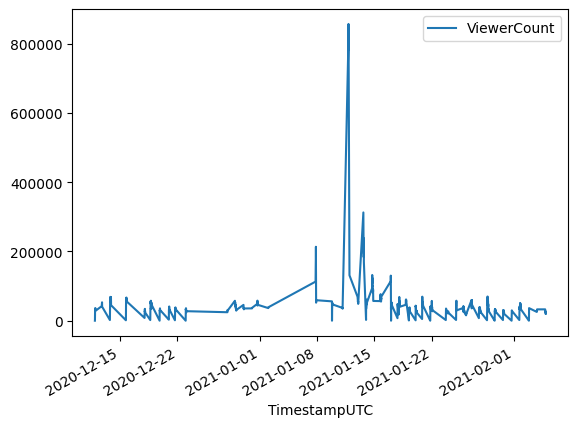

In [147]:
df[(df["Name"].isin(user)) & (df["CurrentGameID"].isin(game_id))].sort_values(
    "TimestampUTC",
    ascending=True
).plot(x="TimestampUTC", y="ViewerCount")

In [148]:
df_duration_per_game = df.groupby([
    "Name",
    "CurrentGameID",
    "StarttimeUTC"],
    as_index=False
).agg({
    "TimestampUTC": ["max"]}
)

In [149]:
df_duration_per_game["duration"] = df_duration_per_game[("TimestampUTC", "max")] - df_duration_per_game["StarttimeUTC"]
df_duration_per_game["duration"] = df_duration_per_game["duration"].dt.total_seconds()
df_duration_per_game["duration"] = df_duration_per_game["duration"] /3600

<Axes: xlabel='duration', ylabel='Density'>

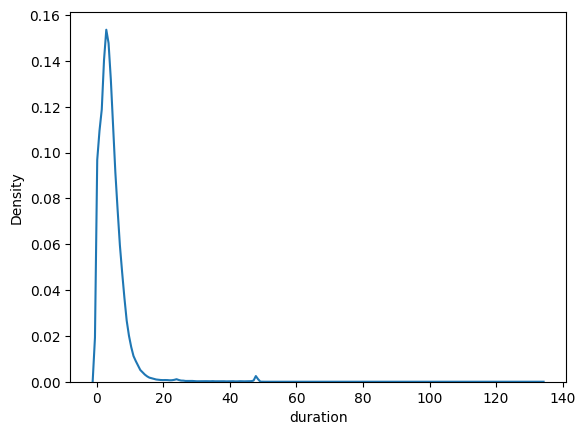

In [150]:
sns.kdeplot(x="duration", data=df_duration_per_game)